## 필요 EDA 실행
### 4_이후에 파일


In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 필요 패키지 설치

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
# 런타임 다시 시작 후 실행
%matplotlib inline
import matplotlib as mpl

In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 45.6 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib

##### 함수 선언 정의

In [ ]:
# EDA 코드

def distribution_plot(df, numeric_columns, save_path = None):
    """
    전세/월세별 수치형 변수의 분포를 선 그래프로 시각화하는 함수
    df: pandas DataFrame
    numeric_columns: 수치형 데이터 컬럼 목록
    housing_type: 분석할 주택유형 (기본값은 None으로 전체 데이터 분석)
    """

    # 주택 유형별 필터링
    housing_type = df["주택유형"].iloc[2]
    rent = "전세"


    plt.figure(figsize=(12, len(numeric_columns) * 3))  # 가변적인 크기 설정

    for i, col in enumerate(numeric_columns, 1):
        plt.subplot(len(numeric_columns), 1, i)  # 여러 개의 그래프 배치

        # 전세 (파란색) - 선 그래프
        sns.kdeplot(df[col], label=f"전세 {col}", color='blue', linewidth=2)

        plt.title(f"{col} 분포 ({housing_type if housing_type else '전체'})")
        plt.legend()

    plt.tight_layout()
    plt.savefig(f"{save_path}Distribution_{housing_type}.png", dpi=300, bbox_inches='tight')
    plt.show()

# 3. 히트맵 (상관행렬)
def heat_map(df, numeric_columns, save_path = None):
    """
    df param: pandas DataFrame
    numeric_columns param: list of numeric columns
    is_rent param: 월세 여부 (1이면 월세, 0이면 전세)
    housing_type param: 주택유형 (None이면 전체)
    """
    # 월세유무와 주택유형을 인자로 받아 필터링

    housing_type = df["주택유형"].iloc[2]
    rent = "전세"


    corr_matrix = df[numeric_columns].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'{housing_type}-{rent}상관행렬 히트맵')
    plt.savefig(f"{save_path}{rent}-{housing_type}_ScatterMatrix.png", dpi=300, bbox_inches='tight')
    plt.show()
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

def scatter_plot(df, numeric_columns, save_path=None):
    """
    df param: pandas DataFrame
    numeric_columns param: list of numeric columns
    save_path param: Save directory path (str)
    """
    # 주택유형 & 전월세구분 가져오기
    housing_type = df["주택유형"].iloc[2]
    rent = "전세"

    # Pairplot 생성 (is_rent 없이)
    pairplot = sns.pairplot(df[numeric_columns],
                             diag_kind="kde",
                             diag_kws={"fill": True, "alpha": 0.5},  # 밀도 색상 투명도 추가
                             plot_kws={"s": 5, "alpha": 0.7})  # 점 크기 & 투명도 조정

    # 화질 개선
    pairplot.fig.set_dpi(500)  # DPI 높이기
    pairplot.fig.set_size_inches(15, 10)  # 크기 조정

    # 저장 경로 처리
    if save_path:
        filename = f"{rent}-{housing_type}_ScatterMatrix.png"

        pairplot.savefig(filename, dpi=500, bbox_inches="tight")  # 고화질 저장

    plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.pyplot as plt
import os

def scatter_plot(df, numeric_columns, save_path=None):
    """
    컬럼별로 다른 색상을 적용하여 scatter matrix를 그리고 저장하는 함수.

    Parameters:
    df : pandas DataFrame
    numeric_columns : 리스트, 숫자형 컬럼명 리스트
    save_path : str, 저장할 경로 (기본값: None)
    """
    # 다양한 색상을 위한 컬러 맵 (컬럼 수에 맞춰 자동 반복)
    palette_list = sns.color_palette("husl", len(numeric_columns))

    # PairGrid 생성
    g = sns.PairGrid(df[numeric_columns])

    # 대각선: 밀도 함수 (KDE)
    for i, col in enumerate(numeric_columns):
        g.map_diag(sns.kdeplot, color=palette_list[i], fill=True, alpha=0.5)

    # 비대각선: 산점도 (컬럼별 색 다르게)
    for i, row in enumerate(g.axes):
        for j, ax in enumerate(row):
            if i != j:  # 대각선이 아닌 경우만 적용
                sns.scatterplot(data=df, x=numeric_columns[j], y=numeric_columns[i],
                                color=palette_list[i], alpha=0.7, s=5, ax=ax)

    # DPI 및 크기 조정
    g.fig.set_dpi(300)
    g.fig.set_size_inches(15, 10)

    # 저장 처리
    if save_path:
        os.makedirs(save_path, exist_ok=True)  # 디렉토리 없으면 생성
        filename = os.path.join(save_path, "ScatterMatrix.png")
        g.fig.savefig(filename, dpi=300, bbox_inches='tight')  # 확실한 저장 처리
        print(f"✅ 저장 완료: {filename}")

    plt.show()


#### dataload

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/predict_price/DATA/4_final_lease.csv')

In [ ]:
def histo_mean(df, save_path=None, housing_type="단지별 평균 보증금"):
    """
    df: pandas DataFrame
    save_path: 저장할 경로 (str)
    housing_type: 그래프 제목을 위한 문자열
    """
    plt.figure(figsize=(10, 5))

    # KDE 그래프 (밀도 함수) - 예쁜 색상 적용
    sns.kdeplot(
        df.loc[df['주택유형'] == "아파트", '단지별_평균_보증금_log'],
        fill=True, color="#3498db", alpha=0.6, linewidth=2, label="아파트"  # 블루 계열 (깔끔한 색)
    )

    sns.kdeplot(
        df.loc[df['주택유형'] == "오피스텔", '단지별_평균_보증금_log'],
        fill=True, color="#e74c3c", alpha=0.6, linewidth=2, label="오피스텔"  # 레드 계열 (깔끔한 색)
    )

    # 스타일 및 레이블 설정
    plt.legend()
    plt.title(f"{housing_type} 로그 변환 후 비교 (아파트 vs 오피스텔)", fontsize=14)
    plt.xlabel("로그 변환된 보증금", fontsize=12)
    plt.ylabel("밀도", fontsize=12)
    plt.grid(alpha=0.3)  # 연한 그리드 추가

    # 저장 옵션
    if save_path:
        plt.savefig(f"{save_path}{housing_type}_로그변환_KDE.png", dpi=500, bbox_inches="tight")

    plt.show()


In [ ]:
def histo_mean_each(df, save_path=None, housing_type="보증금_log"):
    """
    df: pandas DataFrame
    save_path: 저장할 경로 (str)
    housing_type: 그래프 제목을 위한 문자열
    """
    plt.figure(figsize=(10, 5))

    # KDE 그래프 (밀도 함수) - 예쁜 색상 적용
    sns.kdeplot(
        df.loc[df['주택유형'] == "아파트", housing_type],
        fill=True, color="#3498db", alpha=0.6, linewidth=2, label="아파트"  # 블루 계열 (깔끔한 색)
    )

    sns.kdeplot(
        df.loc[df['주택유형'] == "오피스텔", housing_type],
        fill=True, color="#e74c3c", alpha=0.6, linewidth=2, label="오피스텔"  # 레드 계열 (깔끔한 색)
    )

    # 스타일 및 레이블 설정
    plt.legend()
    plt.title(f"{housing_type} 비교 (아파트 vs 오피스텔)", fontsize=14)
    plt.xlabel(f"{housing_type}", fontsize=12)
    plt.ylabel("밀도", fontsize=12)
    plt.grid(alpha=0.3)  # 연한 그리드 추가

    # 저장 옵션
    if save_path:
        plt.savefig(f"{save_path}{housing_type}_KDE.png", dpi=500, bbox_inches="tight")

    plt.show()

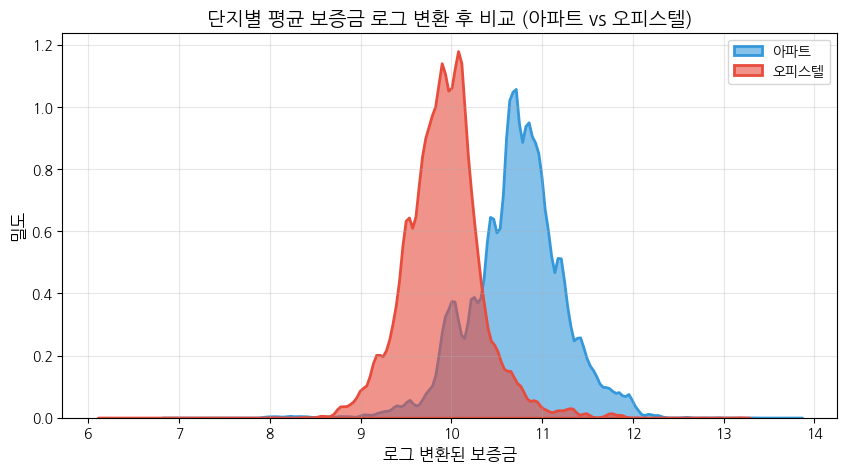

In [ ]:
save_path = '/content/drive/MyDrive/Colab Notebooks/predict_price/'
histo_mean(df, save_path=save_path)

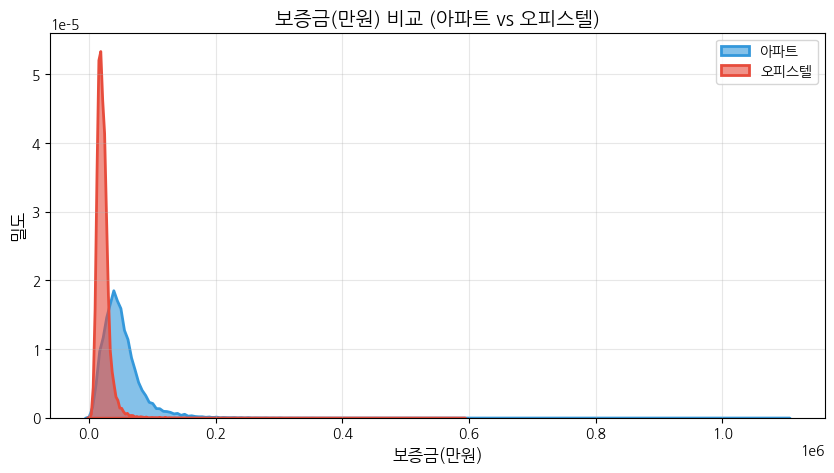

In [ ]:
histo_mean_each(df, save_path=save_path, housing_type="보증금(만원)")

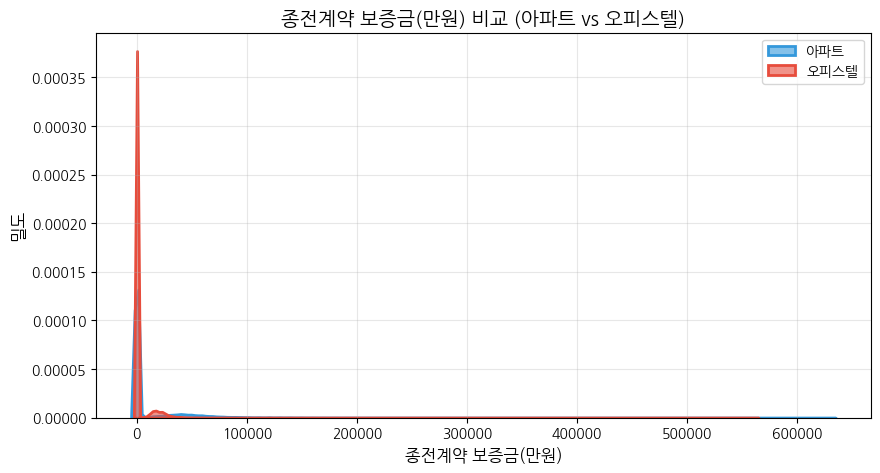

In [ ]:
histo_mean_each(df, save_path=save_path, housing_type='종전계약 보증금(만원)')

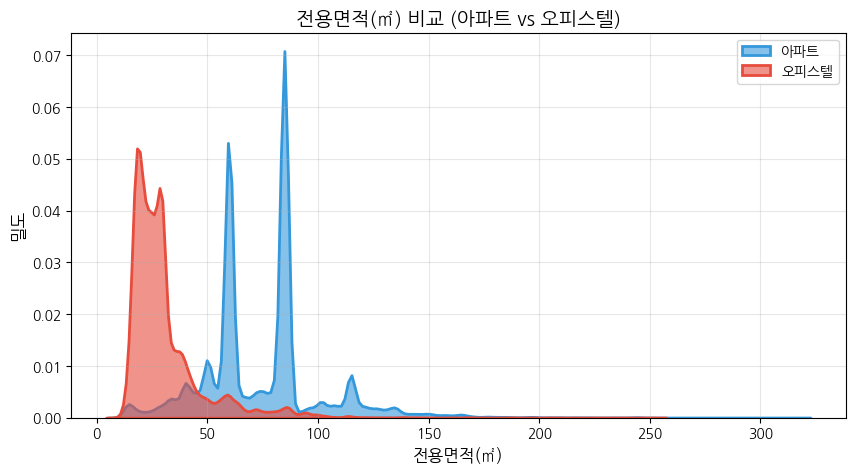

In [ ]:
histo_mean_each(df, save_path=save_path, housing_type='전용면적(㎡)')

In [ ]:
df.columns


Index(['Unnamed: 0', '보증금(만원)', '보증금_log', '보증금 변화', '종전계약 보증금(만원)',
       '단지별_평균_보증금', '단지별_평균_보증금_log', 'index', 'rate', 'pp_rate', '금융위기_경과년수',
       '계약날짜', '계약연도', '계약분기', '계약개월수', '계약구분_보완', 'is_new_contract',
       'is_renewal', '갱신요구권 사용', '주택유형', '전용면적(㎡)', '건축년도', '층', '단지갯수', '동',
       '전체주소'],
      dtype='object')

In [ ]:
list(df.columns)

['Unnamed: 0',
 '보증금(만원)',
 '보증금_log',
 '보증금 변화',
 '종전계약 보증금(만원)',
 '단지별_평균_보증금',
 '단지별_평균_보증금_log',
 'index',
 'rate',
 'pp_rate',
 '금융위기_경과년수',
 '계약날짜',
 '계약연도',
 '계약분기',
 '계약개월수',
 '계약구분_보완',
 'is_new_contract',
 'is_renewal',
 '갱신요구권 사용',
 '주택유형',
 '전용면적(㎡)',
 '건축년도',
 '층',
 '단지갯수',
 '동',
 '전체주소']

In [ ]:
numeric_columns_lease = ['전용면적(㎡)', '건축년도','층','보증금(만원)','종전계약 보증금(만원)' ,'보증금 변화', "보증금_log", "단지별_평균_보증금_log",'단지별_평균_보증금', 'index', 'rate','pp_rate']
if numeric_columns_lease in list(df.columns):
    print("good")
apt_lease = df[df['주택유형'] == '아파트']
office_lease = df[df['주택유형'] == '오피스텔']

In [ ]:
apt_lease_sam = apt_lease.sample(n=10000, random_state=42)  # 1만 개 샘플링
office_lease_sam = office_lease.sample(n=10000, random_state=42)  # 1만 개 샘플링

In [ ]:
scatter_plot(apt_lease_sam, numeric_columns_lease, save_path= save_path)
scatter_plot(office_lease_sam, numeric_columns_lease, save_path= save_path)

Output hidden; open in https://colab.research.google.com to view.

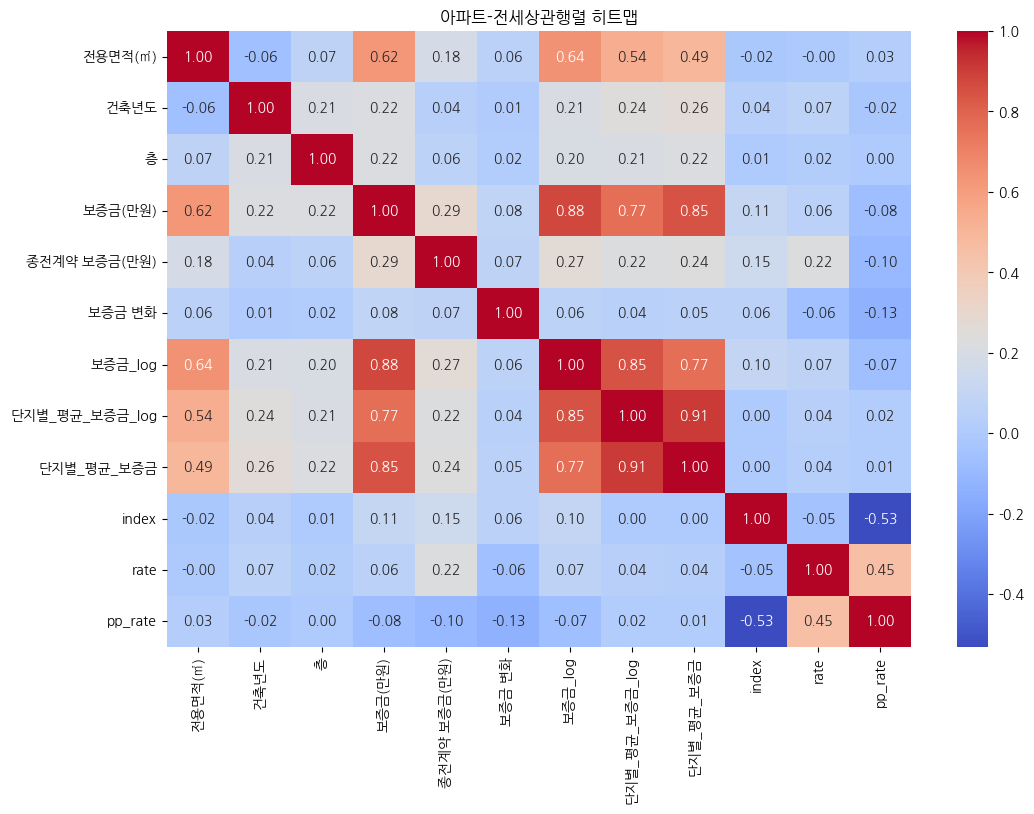

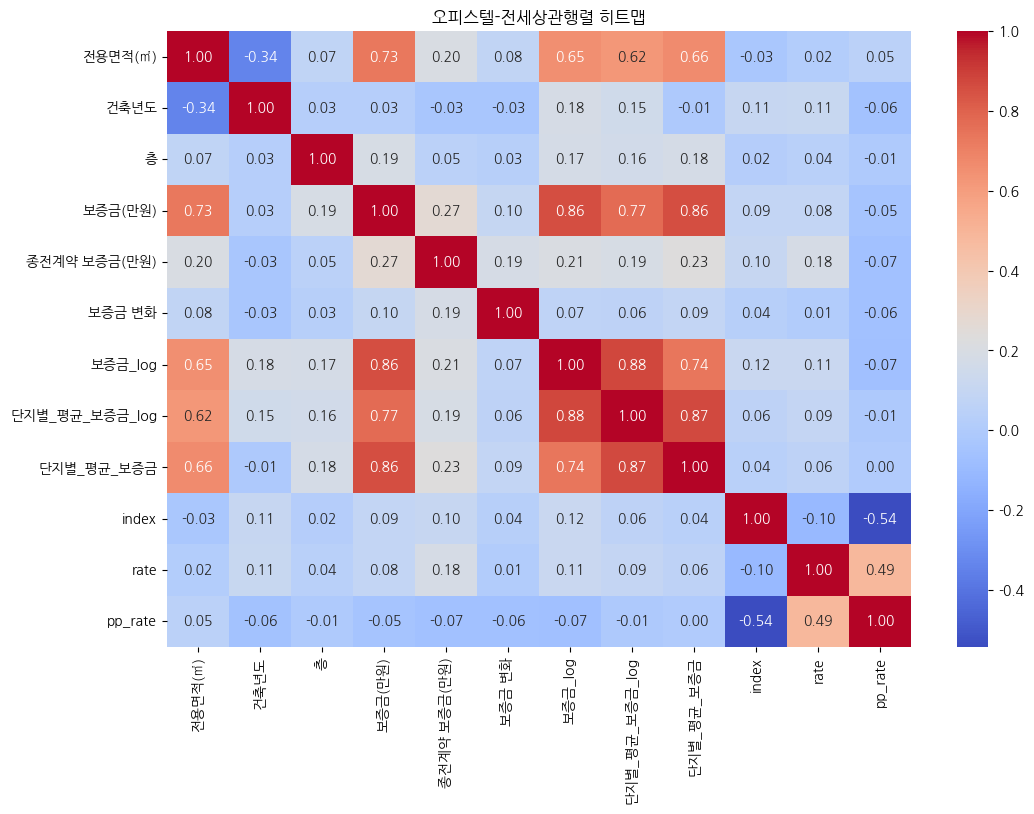

In [ ]:
heat_map(apt_lease, numeric_columns_lease, save_path= save_path)
heat_map(office_lease, numeric_columns_lease, save_path= save_path)

KeyError: '단지명'